###### Práctica Reduccción de Dimensionalidad
* Métodos de Filtrado
* Métodos Wrapper
* Métodos Extracción:
    * LDA
    * PCA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_selection as FS

data = pd.read_csv("./wine_dataset.csv", delimiter=";")
data.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se sustituye la columna Type por un valor categórico

In [4]:
#data["Type"] = pd.Categorical.from_array(data["Type"]).codes
data["Type"].replace("A",0)
data["Type"].replace("B",1)
data["Type"].replace("C",2)
data.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Separamos la columna target del resto de variables predictoras

In [6]:

data_y = data["Type"]
data_X = data.drop("Type", 1)
data_X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Mutual Information

In [10]:
mi = FS.mutual_info_classif(data_X, data_y)
print(mi)
data_X.head(0)

[ 0.4599294   0.27152699  0.06958233  0.24167447  0.20623619  0.4182469
  0.66461676  0.10953566  0.29447472  0.55321666  0.45024783  0.51984446
  0.57876439]


,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline


In [11]:
names=data_X.head(0)
names

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline


In [12]:
indice=np.argsort(mi)[::-1]
print(indice)
print(names[indice])

[ 6 12  9 11  0 10  5  8  1  3  4  7  2]


KeyError: '[ 6 12  9 11  0 10  5  8  1  3  4  7  2] not in index'

In [7]:
mi_regr = FS.mutual_info_regression(data_X, data_y)
indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)
print(names[indice_regr])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[ 6 12  9 11  0 10  5  8  1  3  4  7  2]


NameError: name 'names' is not defined

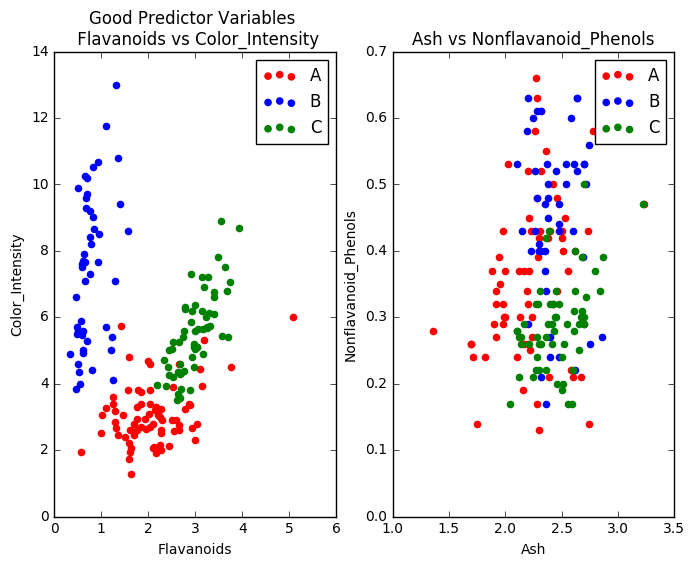

In [61]:
plt.figure(figsize=(8,6))
plt.subplot(121)

plt.scatter(data[data.Type==1].Flavanoids,data[data.Type==1].Color_Intensity, color='red')
plt.scatter(data[data.Type==2].Flavanoids,data[data.Type==2].Color_Intensity, color='blue')
plt.scatter(data[data.Type==0].Flavanoids,data[data.Type==0].Color_Intensity, color='green')
plt.title('Good Predictor Variables \n Flavanoids vs Color_Intensity')
plt.xlabel('Flavanoids')
plt.ylabel('Color_Intensity')
plt.legend(['A','B','C'])

plt.subplot(122)

plt.scatter(data[data.Type==1].Ash,data[data.Type==1].Nonflavanoid_Phenols, color='red')
plt.scatter(data[data.Type==2].Ash,data[data.Type==2].Nonflavanoid_Phenols, color='blue')
plt.scatter(data[data.Type==0].Ash,data[data.Type==0].Nonflavanoid_Phenols, color='green')
plt.title('Ash vs Nonflavanoid_Phenols')
plt.xlabel('Ash')
plt.ylabel('Nonflavanoid_Phenols')
plt.legend(['A','B','C'])
plt.show()

###### Chi-Square

Ahora aplicamos Chi-Square para seleccionar las variables informativas


In [62]:


chi = FS.chi2(X = data_X, y = data["Type"])[0]
print(chi)
indice_chi=np.argsort(chi)[::-1]
print(indice_chi)
print(names[indice_chi])



[  5.44549882e+00   2.80686046e+01   7.43380598e-01   2.93836955e+01
   4.50263809e+01   1.56230759e+01   6.33343081e+01   1.81548480e+00
   9.36828307e+00   1.09016647e+02   5.18253981e+00   2.33898834e+01
   1.65400671e+04]
[12  9  6  4  3  1 11  5  8  0 10  7  2]
Empty DataFrame
Columns: [Proline, Color_Intensity, Flavanoids, Magnesium, Ash_Alcalinity, Malic_Acid, OD280_OD315, Total_Phenols, Proanthocyanins, Alcohol, Hue, Nonflavanoid_Phenols, Ash]
Index: []


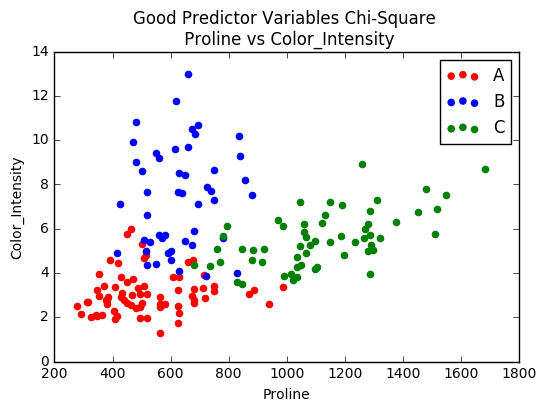

In [63]:
plt.figure()

plt.scatter(data[data.Type==1].Proline,data[data.Type==1].Color_Intensity, color='red')
plt.scatter(data[data.Type==2].Proline,data[data.Type==2].Color_Intensity, color='blue')
plt.scatter(data[data.Type==0].Proline,data[data.Type==0].Color_Intensity, color='green')
plt.title('Good Predictor Variables Chi-Square \n Proline vs Color_Intensity')
plt.xlabel('Proline')
plt.ylabel('Color_Intensity')
plt.legend(['A','B','C'])
plt.show()

### Principal Component Analysis (PCA)

In [64]:
from sklearn.decomposition.pca import PCA

##### PCA without normalization

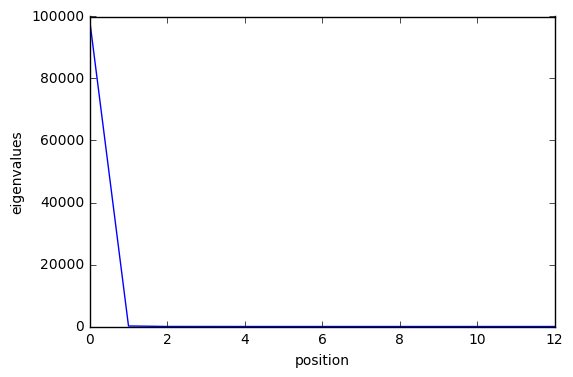

Eigenvalues
 [  9.86444761e+04   1.71565967e+02   9.38509059e+00   4.96313828e+00
   1.22194160e+00   8.36338792e-01   2.77406256e-01   1.50530810e-01
   1.11467008e-01   7.12997795e-02   3.73648779e-02   2.09539821e-02
   8.15761492e-03]

Explained variance ratio (first two components):
 [  9.98091230e-01   1.73591562e-03   9.49589576e-05   5.02173562e-05
   1.23636847e-05   8.46213034e-06   2.80681456e-06   1.52308053e-06
   1.12783044e-06   7.21415811e-07   3.78060267e-07   2.12013755e-07
   8.25392788e-08]


In [65]:



pca = PCA()
pca.fit(data_X)
plt.plot(pca.explained_variance_)
plt.ylabel("eigenvalues")
plt.xlabel("position")
plt.show()
print ("Eigenvalues\n",pca.explained_variance_)
# Percentage of variance explained for each components
print('\nExplained variance ratio (first two components):\n %s'
      % str(pca.explained_variance_ratio_))



Dibujamos la proyección en las dos primeras componentes principales

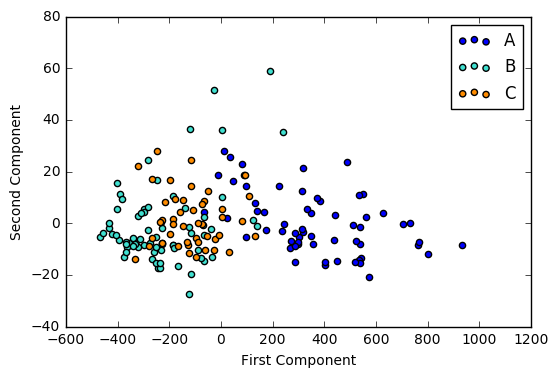

In [66]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(data_X))

pca_A = X_pca[data_y == 0]
pca_B = X_pca[data_y == 1]
pca_C = X_pca[data_y == 2]

#plot
plt.scatter(x = pca_A[0], y = pca_A[1], c="blue")
plt.scatter(x = pca_B[0], y = pca_B[1], c="turquoise")
plt.scatter(x = pca_C[0], y = pca_C[1], c="darkorange")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend(["A","B","C"])
plt.show()

#### PCA with Normalization

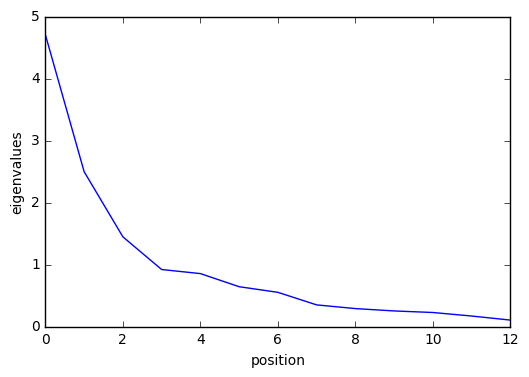

Eigenvalues
 [ 4.70585025  2.49697373  1.44607197  0.91897392  0.85322818  0.64165703
  0.55102831  0.34849736  0.28887994  0.25090248  0.22578864  0.16877023
  0.10337794]

Explained variance ratio (first two components):
 [ 0.36198848  0.1920749   0.11123631  0.0706903   0.06563294  0.04935823
  0.04238679  0.02680749  0.02222153  0.01930019  0.01736836  0.01298233
  0.00795215]


In [67]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(data_X)

pca = PCA()
pca.fit(X_scaled)
plt.plot(pca.explained_variance_)
plt.ylabel("eigenvalues")
plt.xlabel("position")
plt.show()
print ("Eigenvalues\n",pca.explained_variance_)

# Percentage of variance explained for each components
print('\nExplained variance ratio (first two components):\n %s'
      % str(pca.explained_variance_ratio_))




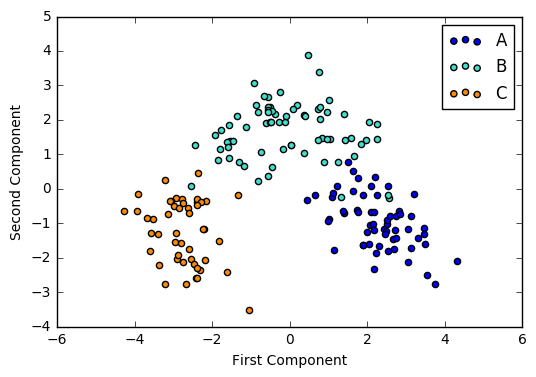

In [68]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

pca_A = X_pca[data_y == 0]
pca_B = X_pca[data_y == 1]
pca_C = X_pca[data_y == 2]

#plot
plt.scatter(x = pca_A[0], y = pca_A[1], c="blue")
plt.scatter(x = pca_B[0], y = pca_B[1], c="turquoise")
plt.scatter(x = pca_C[0], y = pca_C[1], c="darkorange")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend(["A","B","C"])
plt.show()

### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##### LDA without normalization

In [70]:
lda = LDA(n_components=2)
lda.fit(data_X,data_y)
print("Porcentaje explicado:", lda.explained_variance_ratio_)


Porcentaje explicado: [ 0.68747889  0.31252111]


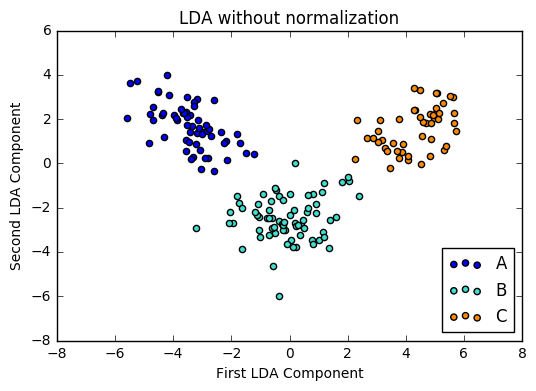

In [71]:

X_lda = pd.DataFrame(lda.fit_transform(data_X, data_y))

# Dividimos en los 3 tipos para ponerles diferentes colores
lda_A = X_lda[data_y == 0]
lda_B = X_lda[data_y == 1]
lda_C = X_lda[data_y == 2]

#plot
plt.scatter(x = lda_A[0], y = lda_A[1], c="blue")
plt.scatter(x = lda_B[0], y = lda_B[1], c="turquoise")
plt.scatter(x = lda_C[0], y = lda_C[1], c="darkorange")
plt.title("LDA without normalization")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend((["A","B","C"]), loc="lower right")
plt.show()


#### LDA with normalization

In [72]:
lda = LDA(n_components=2)
lda.fit(X_scaled,data_y)
print("Porcentaje explicado:", lda.explained_variance_ratio_)

Porcentaje explicado: [ 0.68747889  0.31252111]


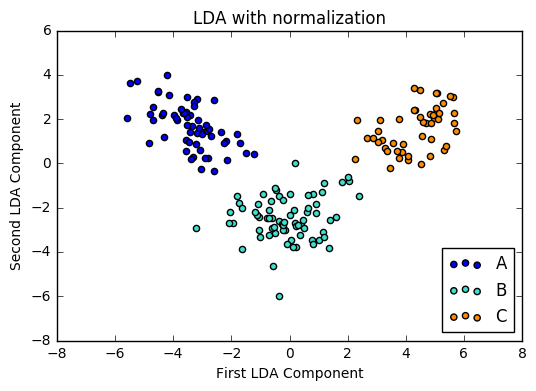

In [73]:

X_lda = pd.DataFrame(lda.fit_transform(data_X, data_y))

# Dividimos en los 3 tipos para ponerles diferentes colores
lda_A = X_lda[data_y == 0]
lda_B = X_lda[data_y == 1]
lda_C = X_lda[data_y == 2]

#plot
plt.scatter(x = lda_A[0], y = lda_A[1], c="blue")
plt.scatter(x = lda_B[0], y = lda_B[1], c="turquoise")
plt.scatter(x = lda_C[0], y = lda_C[1], c="darkorange")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend(["A","B","C"],loc="lower right")
plt.title("LDA with normalization")
plt.show()


With this we have verified that LDA is invariant to scale

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.